In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Class-3/cars24.csv")

In [11]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [5]:
df['make'].nunique()

41

In [6]:
df['model'].nunique()

3233

In [12]:
df.groupby("make")["selling_price"].mean()

make
AMBASSADOR        1.452500
AUDI             17.177585
BENTLEY          20.902500
BMW              17.349017
CHEVROLET         2.723621
DAEWOO            0.780000
DATSUN            3.205176
DC               11.925000
FERRARI          20.902500
FIAT              3.152795
FORCE             5.520000
FORD              5.858258
HONDA             5.979902
HYUNDAI           5.458819
ISUZU            14.037708
JAGUAR           20.187500
JEEP             16.261890
KIA              15.731515
LAMBORGHINI      20.902500
LAND             20.560147
LEXUS            20.902500
MAHINDRA          7.315421
MARUTI            4.684721
MASERATI         20.902500
MERCEDES-AMG     20.902500
MERCEDES-BENZ    17.071479
MG               17.529474
MINI             18.529457
MITSUBISHI        8.631026
NISSAN            4.611877
OPEL              1.500000
OPELCORSA         1.516667
PORSCHE          20.866400
PREMIER           2.550000
RENAULT           4.606651
ROLLS-ROYCE      20.902500
SKODA             7.182

In [13]:
df.groupby("make")["selling_price"].transform("mean")

0         4.684721
1         5.458819
2         5.458819
3         4.684721
4         5.858258
           ...    
19815    10.532763
19816     4.684721
19817     7.182097
19818     7.315421
19819     5.979902
Name: selling_price, Length: 19820, dtype: float64

In [14]:
df["make"]=df.groupby("make")["selling_price"].transform("mean")
df["model"]=df.groupby("model")["selling_price"].transform("mean")

In [15]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


# Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [17]:
X=pd.DataFrame(min_max_scaler.fit_transform(df[['year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5']]),columns= ['year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5'])

In [18]:
y = df['selling_price']

## Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 10)

In [48]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
19738,0.827586,0.023659,0.077500,0.369372,0.153945,0.172414,0.484670,0.393816,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
17034,0.862069,0.016528,0.210345,0.184834,0.111111,0.137931,0.194048,0.243142,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
17080,0.793103,0.020597,0.144569,0.184834,0.134879,0.206897,0.194048,0.290510,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7420,0.827586,0.005237,0.143276,0.177429,0.099839,0.172414,0.120521,0.121897,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
15375,0.862069,0.019448,0.110345,0.221712,0.179227,0.137931,0.258412,0.292240,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [49]:
X_test.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
3386,0.620690,0.015764,0.094828,0.234893,0.160515,0.379310,0.194048,0.083748,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
11664,0.896552,0.007111,0.171034,0.177577,0.127214,0.103448,0.178964,0.185710,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
7327,0.931034,0.012606,0.095172,0.408027,0.272947,0.068966,0.484670,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17993,0.862069,0.006816,0.102586,0.221564,0.186296,0.137931,0.252367,0.364233,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
19419,0.793103,0.015754,0.120690,0.177429,0.131562,0.206897,0.258412,0.173247,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


## Linear Regression Gradient Descent

In [54]:
# initialise W and w0

W = np.zeros(X_train.shape[1])
w0 = 0

In [58]:
def linear_regression(X, y, W, w0, iters = 1000, ss = 0.01):
  N = len(y)
  rss_l = []
  for i in range(iters):

    y_pred = np.dot(X,W)+w0

    rss = np.square(np.subtract(y,y_pred)).mean()

    W_slope  = -((y-y_pred).dot(2*X))/N
    w0_slope = -(2*np.sum(y-y_pred))/N

    W = W - ss*(W_slope)
    w0 = w0 - ss*(w0_slope)
    rss_l.append(rss)

  return W, w0, rss_l

In [59]:
W, w0, rss_l = linear_regression(X_train, y_train, W, w0, iters = 1000, ss = 0.01)

In [60]:
W

year                3.366495
km_driven          -0.097471
mileage            -0.177364
engine              1.680212
max_power           2.017391
age                -1.730752
make                4.374664
model               8.251136
Individual         -0.486819
Trustmark Dealer    0.018099
Diesel              1.314292
Electric            0.025348
LPG                -0.031379
Petrol              0.319936
Manual             -3.097739
5                   0.051813
>5                  1.206585
Name: selling_price, dtype: float64

In [61]:
w0

1.6357423863327443

<Axes: >

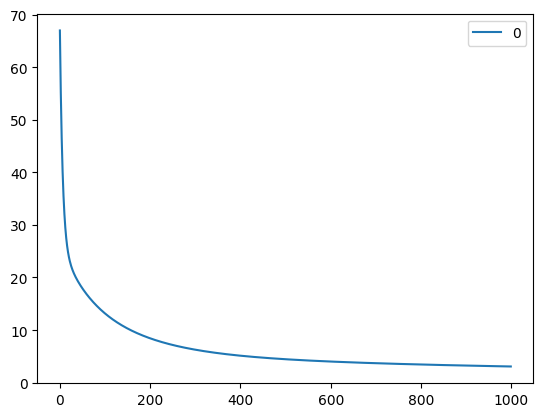

In [63]:
pd.DataFrame(rss_l).plot(kind = 'line')

In [62]:
y_pred_test = np.dot(X_test,W)+w0

In [65]:
def r2(X, y):
  y_pred = np.dot(X,W)+w0
  rss = np.sum((y-y_pred)**2)
  tss = np.sum((y-y.mean())**2)
  r2 = 1-(rss/tss)
  return r2

In [66]:
r2(X_test, y_test)

0.8646625601733989

In [67]:
r2(X_train, y_train)

0.8700703906455993